# Introduction
## In this notebook, I have done the Exploratory Data Analysis for the famous Iris dataset and tried to gain useful insights from the data

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Loading data set

In [4]:
iris_df = pd.read_csv("IRIS.csv")

### Start understanding the data

In [5]:
iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
iris_df.shape

(150, 5)

## Dive deep to the data set

In [10]:
# Further inspecting the dataframe
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"Total No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(iris_df)

,Data Type,Total No of Levels,Levels
sepal.length,float64,35,[5.1 4.9 4.7 4.6 5. 5.4 4.4 4.8 4.3 5.8 5.7 5...
sepal.width,float64,23,[3.5 3. 3.2 3.1 3.6 3.9 3.4 2.9 3.7 4. 4.4 3...
petal.length,float64,43,[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1. 1.9 4.7 4.5 4...
petal.width,float64,22,[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1. 1...
variety,object,3,['Setosa' 'Versicolor' 'Virginica']


In [11]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### We can see that all the col of data set are free of null values and four of them are numeric while one is a categorical col which also can be seen by the dtypes function.

In [12]:
iris_df.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

# Stastical Insights
### Now, let's have a look into the stats for this data

In [13]:
iris_df.describe(include='all')

,sepal.length,sepal.width,petal.length,petal.width,variety
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


### Performing just for numeric columns

In [14]:
iris_df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Duplicte Values checking in Data set

In [15]:
iris_df.duplicated().sum() # Total no of duplicates in the dataset


1

In [16]:
iris_df[iris_df.duplicated()] #This shows the actual duplicate rows

,sepal.length,sepal.width,petal.length,petal.width,variety
142,5.8,2.7,5.1,1.9,Virginica


In [19]:
iris_df['variety'].value_counts() #checking the variety col

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

## Checking the Missing Values 

In [20]:
iris_df.isnull().sum(axis=0)

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

## Estimating the Skewness

In [21]:
iris_df.skew()

C:\Users\Decent\AppData\Local\Temp/ipykernel_16520/276201852.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  iris_df.skew()


sepal.length    0.314911
sepal.width     0.318966
petal.length   -0.274884
petal.width    -0.102967
dtype: float64

## Estimating the Kurtosis

In [22]:
iris_df.kurt()

C:\Users\Decent\AppData\Local\Temp/ipykernel_16520/3506961216.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  iris_df.kurt()


sepal.length   -0.552064
sepal.width     0.228249
petal.length   -1.402103
petal.width    -1.340604
dtype: float64

## Targeted Visualization
### The target col is the variety col since, in the end, want to predict the correct species of flower

c:\Users\Decent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


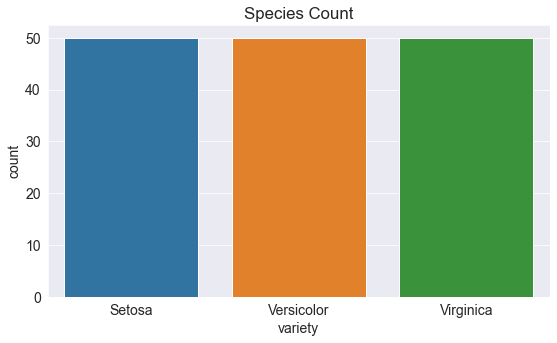

In [23]:
plt.title('Species Count')
sns.countplot(iris_df['variety']);

### This above graphs further tells that our dataset is balanced with equal No of records for all three species.

## Draw the Relation ships between Variables

c:\Users\Decent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


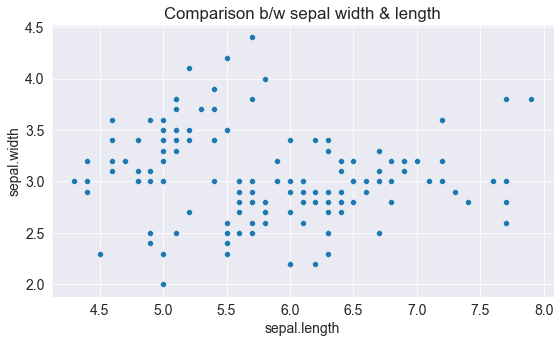

In [26]:
plt.title('Comparison b/w sepal width & length')
sns.scatterplot(iris_df['sepal.length'], iris_df['sepal.width']);

c:\Users\Decent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


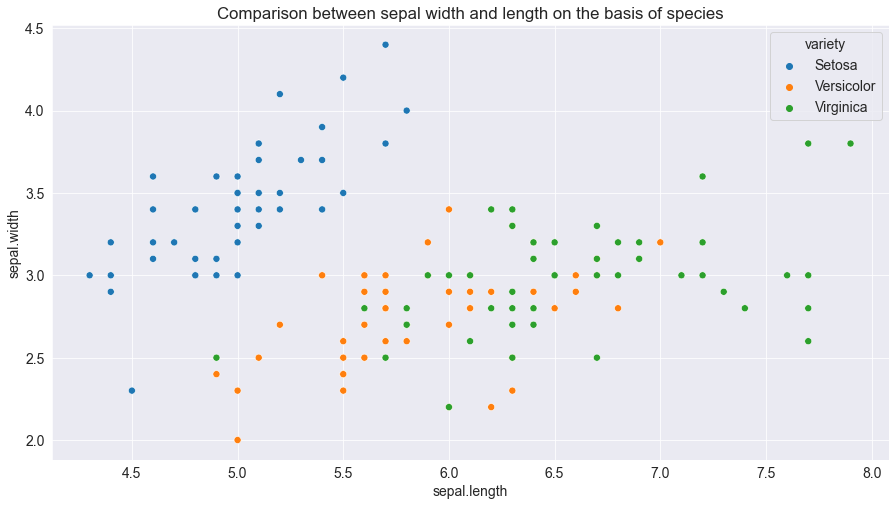

In [30]:
plt.figure(figsize=(15,8))
plt.title('Comparison between sepal width and length on the basis of species')
sns.scatterplot(iris_df['sepal.length'], iris_df['sepal.width'], hue = iris_df['variety'], s= 50);

### From the visualization above, we can tell that the iris-setosa species has smaller sepal length but higher width. While we see Versicolor lies in almost middle for length as well as width. and the Virginica has larger sepal lengths and smaller sepal widths.

## Let's compare the petal length and petal width columns.

c:\Users\Decent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


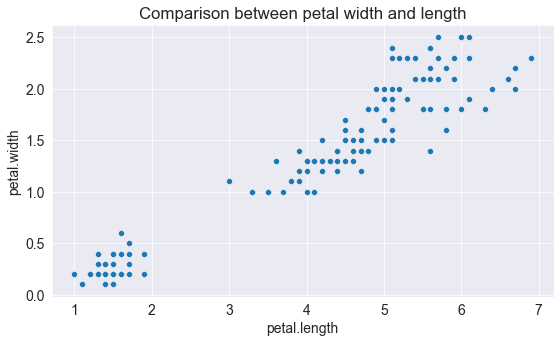

In [28]:
plt.title('Comparison between petal width and length')
sns.scatterplot(iris_df['petal.length'], iris_df['petal.width']);

c:\Users\Decent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


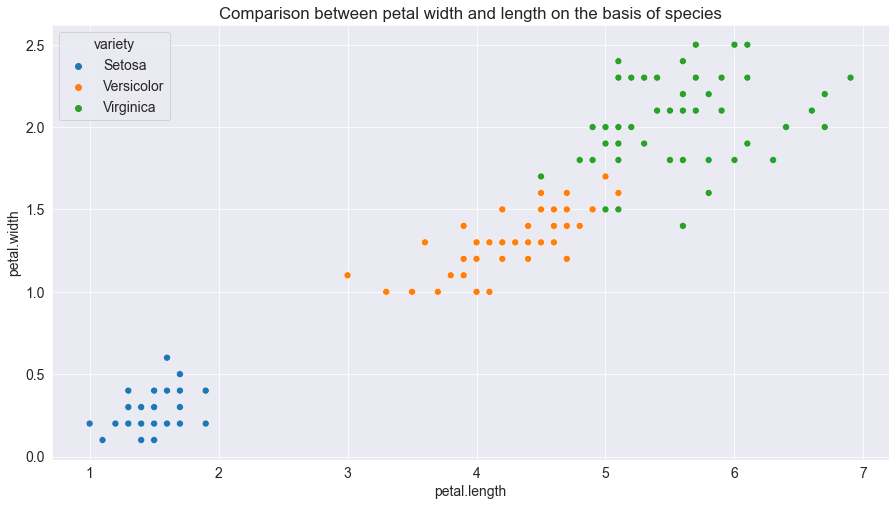

In [29]:
plt.figure(figsize=(15,8))
plt.title('Comparison between petal width and length on the basis of species')
sns.scatterplot(iris_df['petal.length'], iris_df['petal.width'], hue = iris_df['variety'], s= 50);

### As shown above, the setosa has smallest petal length along with petal widths, while Versicolor has average petal length and petal width and the virginica species has the highest petal length as well as petal width.

## Now let's visualize all the columns relationship using pair plots.

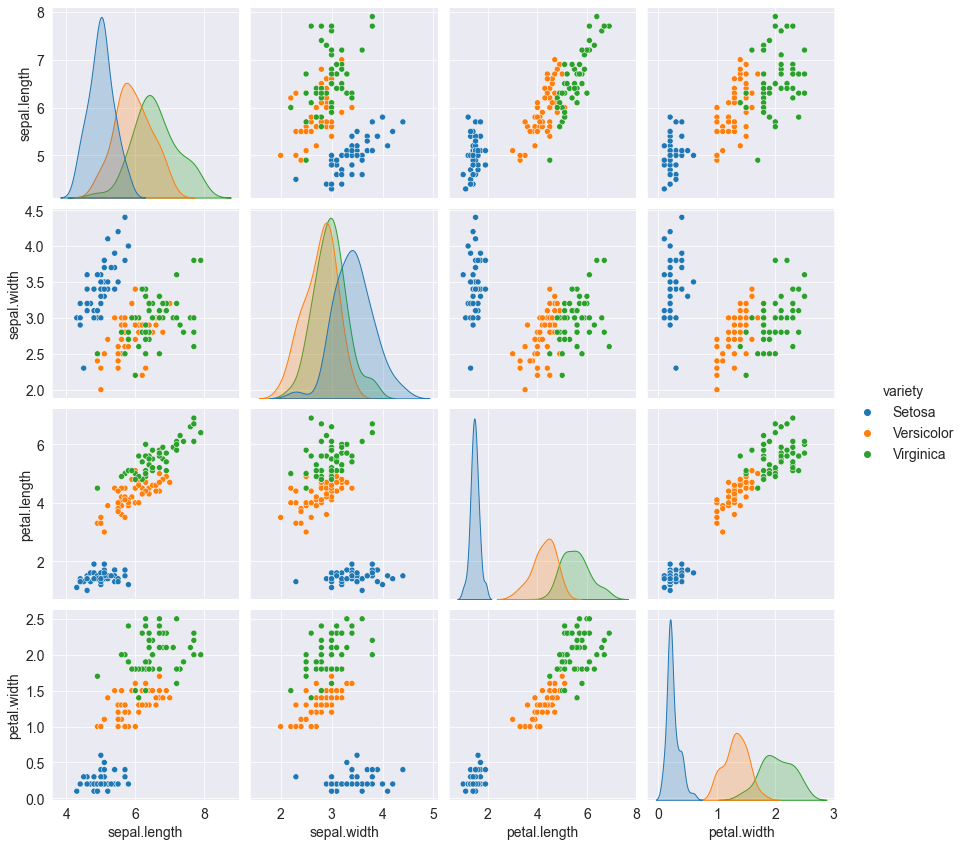

In [31]:
sns.pairplot(iris_df,hue="variety",height=3);

### Pair plot represents the relationship between the target and the variables. We can see that the setosa species has a large difference in its characteristics when compared to the other species, it has smaller petal width and length while its sepal width is high and its sepal length is low.

## Diffrentiating Catagorical and Numerical values 

In [32]:
categorical_columns = iris_df.dtypes[iris_df.dtypes == 'object'].index
print('No of categorical fetures:',len(categorical_columns),'\n')
print(categorical_columns)
print('*'*100)

numerical_columns = iris_df.dtypes[iris_df.dtypes != 'object'].index
print('No of numerical fetures:',len(numerical_columns),'\n')
print(numerical_columns)

No of categorical fetures: 1 

Index(['variety'], dtype='object')
****************************************************************************************************
No of numerical fetures: 4 

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width'], dtype='object')


## Numeric features summary

In [33]:
iris_df[numerical_columns].describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Correlation b/w Variables 

In [34]:
iris_df.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


## Heat map to Visualize the Coorelation

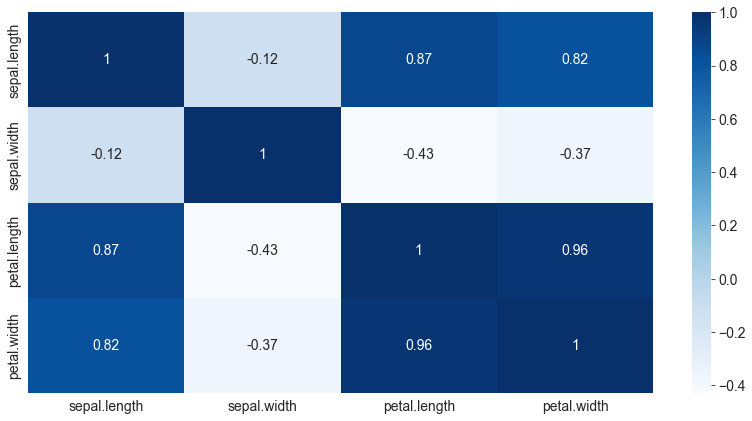

In [36]:
fig = plt.figure(figsize = (14,7))
sns.heatmap(iris_df.corr(), cmap='Blues', annot = True);

### From the above heatmap, we see that both petal_length & petal_width have a high correlation, petal_width & sepal_length have good correlation as well as petal_length and sepal_length have good correlations.

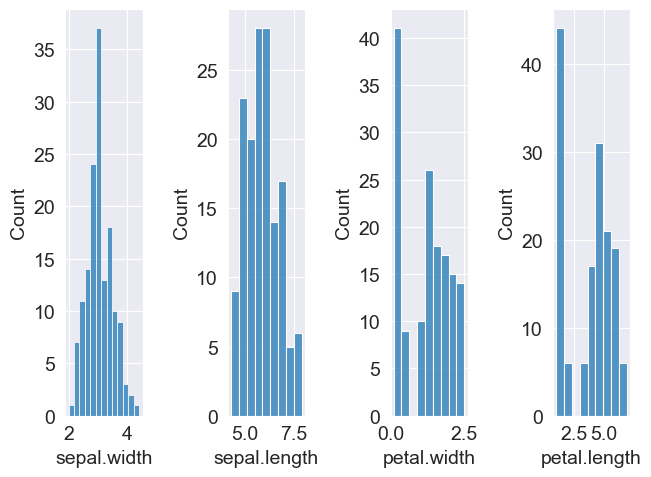

In [38]:
cols = ['sepal.width', 'sepal.length', 'petal.width', 'petal.length']
plt.figure(figsize=(18,5), dpi=100)
i = 1
for col in cols:
    plt.subplot(1,11,i)
    sns.histplot(iris_df[col])
    i = i+1
plt.tight_layout()
plt.show()

## Histograms

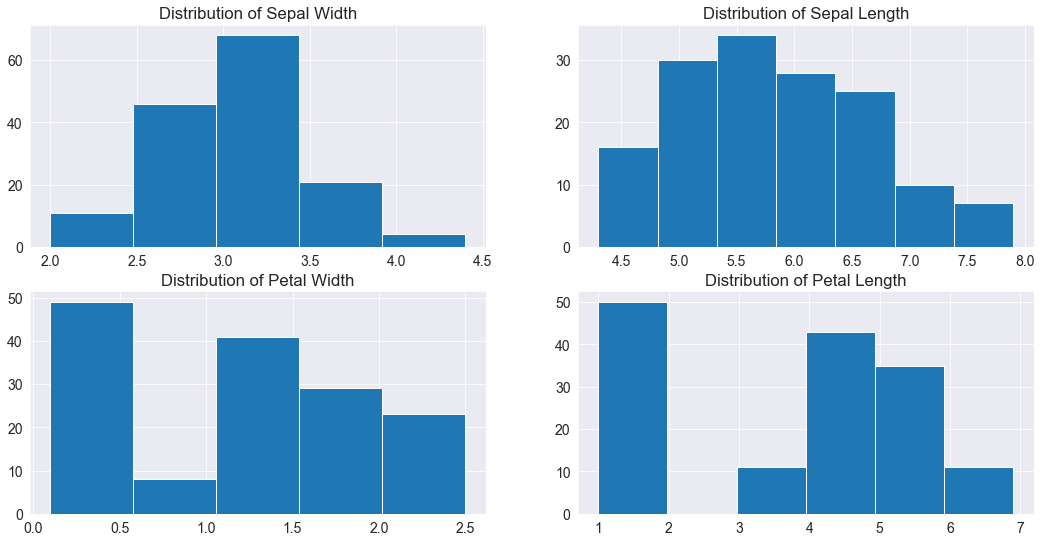

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(18,9))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(iris_df['sepal.width'], bins=5);
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(iris_df['sepal.length'], bins=7);
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(iris_df['petal.width'], bins=5);
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(iris_df['petal.length'], bins=6);

### - The Highest frequency of sepal width is between 3.0 to 3.5 which is around 70.
### - The Highest frequency of sepal length is between 5.5 and 6.0 which is around 35.
### - The Highest frequency of petal width is between 0 to 0.5 which is around 50.
### - The Highest frequency of petal length is between 0 to 0.5 which is around 50.

## Univariate analysis of the Targeted Column

c:\Users\Decent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Decent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Decent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

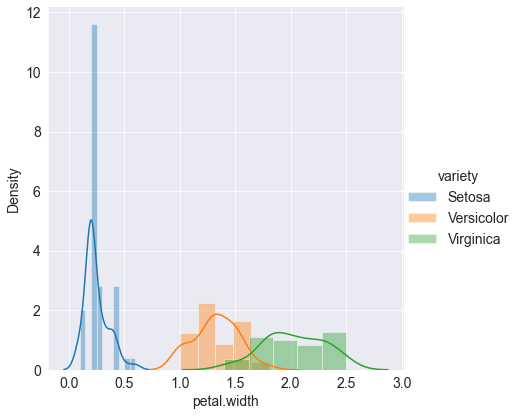

In [42]:
sns.FacetGrid(iris_df,hue="variety",height=6).map(sns.distplot,"petal.width").add_legend();

c:\Users\Decent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Decent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Decent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

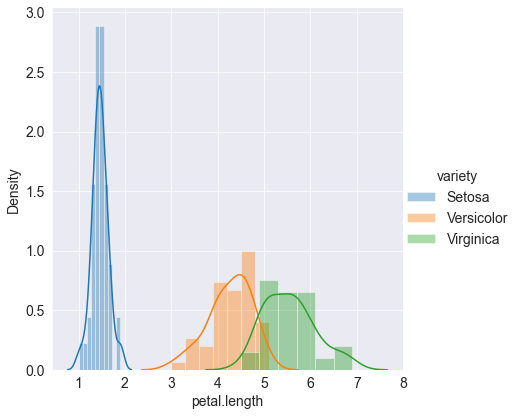

In [44]:
sns.FacetGrid(iris_df,hue="variety",height=6).map(sns.distplot,"petal.length").add_legend();

### Again we see that on the basis of petal length setosa is separable while the other two are still overlapping.

c:\Users\Decent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Decent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Decent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

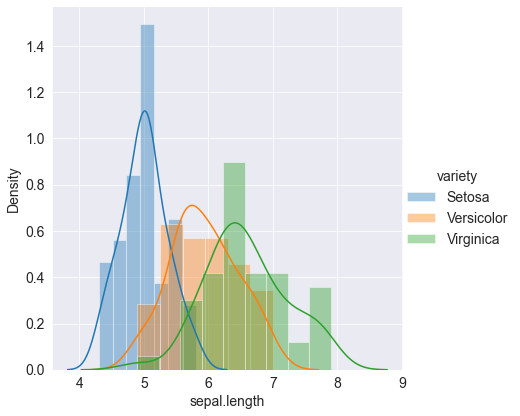

In [45]:
sns.FacetGrid(iris_df,hue="variety",height=6).map(sns.distplot,"sepal.length").add_legend();

### We see it is quite tough to separate the species on the basis of sepal_length alone.

c:\Users\Decent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Decent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Decent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

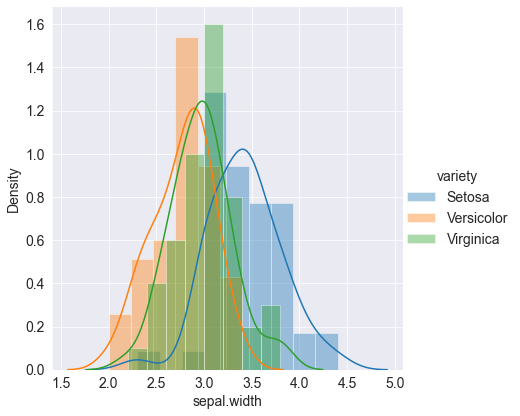

In [46]:
sns.FacetGrid(iris_df,hue="variety",height=6).map(sns.distplot,"sepal.width").add_legend();

### While the overlapping of species is more intense in the case of sepal_width.

## Box Plots

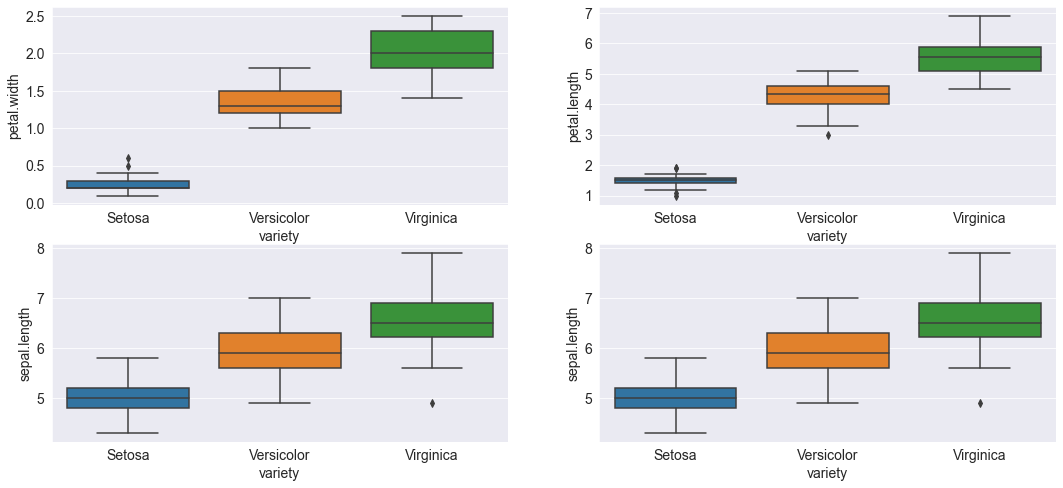

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(18,8))
sns.boxplot(  y="petal.width", x= "variety", data=iris_df,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="petal.length", x= "variety", data=iris_df,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="sepal.length", x= "variety", data=iris_df,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="sepal.length", x= "variety", data=iris_df,  orient='v' , ax=axes[1, 1])
plt.show()

### - Further, we see that the box plots describe that the setosa usually has smaller features with few outliers.
### - The Versicolor species has average features
### - The virginica species has the longest features widths and lengths as compared to others.

# Conclusion

### - The dataset is balanced i.e. equal records are present for all three species.
### - We have four numerical columns while just one categorical column which in turn is our target column.
### - A strong correlation is present between petal width and petal length.
### - The setosa species is the most easily distinguishable because of its small feature size.
### - The Versicolor and Virginica species are usually mixed and are sometimes hard to separate, while usually Versicolor has average feature sizes and virginica has larger feature sizes.